In [1]:
# import

from Modeles import Modele
from Algos import Kl_ucb, Random, Offline

In [2]:
# creation d'un bandit 

MAXTETA = 5
n = 15 #15
k = 3 #3
lam = [(k-i+1)/(2*k+1) for i in range(k)]
teta = [i/n*MAXTETA  for i in range(n)] # utility des bras
W = [x/MAXTETA for x in teta] # attirance des bras
G = [g for g in teta] # gain des bras

b = Modele(n, k, lam, teta, W, G)

In [3]:
# charger un algo
algoKl = Kl_ucb()
algoKl.run(b, 1000)

In [4]:
algoRdm = Random()
algoRdm.run(b, 1000)

In [5]:
algoOff = Offline()
algoOff.run(b, 1000)

In [6]:
def Ymoy(G):
    X = [i  for i in range(len(G))]
    Y = [G[0] for _ in X]
    for i in range(1, len(G)):
        Y[i] = (i*Y[i-1] + G[i])/(i+1)
    return Y

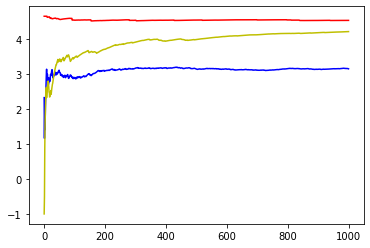

In [9]:
import matplotlib.pyplot as plt
YRdm = Ymoy(algoRdm.Gt)
YKl = Ymoy(algoKl.Gt)
YOff = Ymoy(algoOff.Gt)
plt.plot(YRdm, "b")
plt.plot(YKl, "y")
plt.plot(YOff, "r")